This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray CfRadial1 backend

In this example, we read CfRadial1 data files using the `xradar` `cfradial1` backend.

Data is also exported to ODIM_H5 and CfRadial2.

In [1]:
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load CfRadial1 Volume Data

We use the functionality provided now by [xradar](https://docs.openradarscience.org/projects/xradar/en/stable/) to read the CfRadial1 data into a DataTree.

In [2]:
fpath = "netcdf/cfrad.20080604_002217_000_SPOL_v36_SUR.nc"
f = wrl.util.get_wradlib_data_file(fpath)
vol = xd.io.open_cfradial1_datatree(f)

## Inspect RadarVolume

In [3]:
display(vol)

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 9)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int32 4B ...
│       platform_type        |S32 32B ...
│       primary_axis         |S32 32B ...
│       status_str           |S1 1B ...
│       instrument_type      |S32 32B ...
│       time_coverage_start  |S32 32B ...
│       time_coverage_end    |S32 32B ...
│       latitude             float64 8B ...
│       longitude            float64 8B ...
│       altitude             float64 8B ...
│       sweep_group_name     (sweep) <U7 252B 'sweep_0' 'sweep_1' ... 'sweep_8'
│       sweep_fixed_angle    (sweep) float32 36B ...
│   Attributes: (12/13)
│       Conventions:         CF/Radial instrument_parameters radar_parameters rad...
│       version:             1.2
│       title:               TIMREX
│       institution:         
│       references:          
│       source:              
│       ...                  ...
│       comment:             
│       instrument_name:     SPOLRVP8
│       site_name:           
│       scan_name:           
│       scan_id:             0
│       platform_is_mobile:  false
├── Group: /sweep_0
│       Dimensions:                    (azimuth: 483, range: 996)
│       Coordinates:
│           time                       (azimuth) datetime64[ns] 4kB 2008-06-04T00:15:...
│         * range                      (range) float32 4kB 150.0 300.0 ... 1.494e+05
│         * azimuth                    (azimuth) float32 2kB 0.0 0.75 ... 358.5 359.2
│           elevation                  (azimuth) float32 2kB ...
│           latitude                   float64 8B ...
│           longitude                  float64 8B ...
│           altitude                   float64 8B ...
│       Data variables: (12/18)
│           sweep_number               int32 4B ...
│           sweep_mode                 <U20 80B 'azimuth_surveillance'
│           prt_mode                   |S32 32B ...
│           follow_mode                |S32 32B ...
│           sweep_fixed_angle          float32 4B ...
│           pulse_width                (azimuth) timedelta64[ns] 4kB ...
│           ...                         ...
│           r_calib_index              (azimuth) int8 483B ...
│           measured_transmit_power_h  (azimuth) float32 2kB ...
│           measured_transmit_power_v  (azimuth) float32 2kB ...
│           scan_rate                  (azimuth) float32 2kB ...
│           DBZ                        (azimuth, range) float32 2MB ...
│           VR                         (azimuth, range) float32 2MB ...
├── Group: /sweep_1
│       Dimensions:                    (azimuth: 483, range: 996)
│       Coordinates:
│           time                       (azimuth) datetime64[ns] 4kB 2008-06-04T00:16:...
│         * range                      (range) float32 4kB 150.0 300.0 ... 1.494e+05
│         * azimuth                    (azimuth) float32 2kB 0.0 0.75 ... 358.5 359.2
│           elevation                  (azimuth) float32 2kB ...
│           latitude                   float64 8B ...
│           longitude                  float64 8B ...
│           altitude                   float64 8B ...
│       Data variables: (12/18)
│           sweep_number               int32 4B ...
│           sweep_mode                 <U20 80B 'azimuth_surveillance'
│           prt_mode                   |S32 32B ...
│           follow_mode                |S32 32B ...
│           sweep_fixed_angle          float32 4B ...
│           pulse_width                (azimuth) timedelta64[ns] 4kB ...
│           ...                         ...
│           r_calib_index              (azimuth) int8 483B ...
│           measured_transmit_power_h  (azimuth) float32 2kB ...
│           measured_transmit_power_v  (azimuth) float32 2kB ...
│           scan_rate                  (azimuth) float32 2kB ...
│           DBZ                        (azimuth, range) float32 2MB ...
│           VR                         

## Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [4]:
vol.root

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 9)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int32 4B ...
│       platform_type        |S32 32B ...
│       primary_axis         |S32 32B ...
│       status_str           |S1 1B ...
│       instrument_type      |S32 32B ...
│       time_coverage_start  |S32 32B ...
│       time_coverage_end    |S32 32B ...
│       latitude             float64 8B ...
│       longitude            float64 8B ...
│       altitude             float64 8B ...
│       sweep_group_name     (sweep) <U7 252B 'sweep_0' 'sweep_1' ... 'sweep_8'
│       sweep_fixed_angle    (sweep) float32 36B ...
│   Attributes: (12/13)
│       Conventions:         CF/Radial instrument_parameters radar_parameters rad...
│       version:             1.2
│       title:               TIMREX
│       institution:         
│       references:          
│       source:              
│       ...                  ...
│       comment:             
│       instrument_name:     SPOLRVP8
│       site_name:           
│       scan_name:           
│       scan_id:             0
│       platform_is_mobile:  false
├── Group: /sweep_0
│       Dimensions:                    (azimuth: 483, range: 996)
│       Coordinates:
│           time                       (azimuth) datetime64[ns] 4kB 2008-06-04T00:15:...
│         * range                      (range) float32 4kB 150.0 300.0 ... 1.494e+05
│         * azimuth                    (azimuth) float32 2kB 0.0 0.75 ... 358.5 359.2
│           elevation                  (azimuth) float32 2kB ...
│           latitude                   float64 8B ...
│           longitude                  float64 8B ...
│           altitude                   float64 8B ...
│       Data variables: (12/18)
│           sweep_number               int32 4B ...
│           sweep_mode                 <U20 80B 'azimuth_surveillance'
│           prt_mode                   |S32 32B ...
│           follow_mode                |S32 32B ...
│           sweep_fixed_angle          float32 4B ...
│           pulse_width                (azimuth) timedelta64[ns] 4kB ...
│           ...                         ...
│           r_calib_index              (azimuth) int8 483B ...
│           measured_transmit_power_h  (azimuth) float32 2kB ...
│           measured_transmit_power_v  (azimuth) float32 2kB ...
│           scan_rate                  (azimuth) float32 2kB ...
│           DBZ                        (azimuth, range) float32 2MB ...
│           VR                         (azimuth, range) float32 2MB ...
├── Group: /sweep_1
│       Dimensions:                    (azimuth: 483, range: 996)
│       Coordinates:
│           time                       (azimuth) datetime64[ns] 4kB 2008-06-04T00:16:...
│         * range                      (range) float32 4kB 150.0 300.0 ... 1.494e+05
│         * azimuth                    (azimuth) float32 2kB 0.0 0.75 ... 358.5 359.2
│           elevation                  (azimuth) float32 2kB ...
│           latitude                   float64 8B ...
│           longitude                  float64 8B ...
│           altitude                   float64 8B ...
│       Data variables: (12/18)
│           sweep_number               int32 4B ...
│           sweep_mode                 <U20 80B 'azimuth_surveillance'
│           prt_mode                   |S32 32B ...
│           follow_mode                |S32 32B ...
│           sweep_fixed_angle          float32 4B ...
│           pulse_width                (azimuth) timedelta64[ns] 4kB ...
│           ...                         ...
│           r_calib_index              (azimuth) int8 483B ...
│           measured_transmit_power_h  (azimuth) float32 2kB ...
│           measured_transmit_power_v  (azimuth) float32 2kB ...
│           scan_rate                  (azimuth) float32 2kB ...
│           DBZ                        (azimuth, range) float32 2MB ...
│           VR                         

## Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [5]:
display(vol["sweep_0"])

<xarray.DataTree 'sweep_0'>
Group: /sweep_0
    Dimensions:                    (sweep: 9, azimuth: 483, range: 996)
    Coordinates:
        time                       (azimuth) datetime64[ns] 4kB 2008-06-04T00:15:...
      * range                      (range) float32 4kB 150.0 300.0 ... 1.494e+05
      * azimuth                    (azimuth) float32 2kB 0.0 0.75 ... 358.5 359.2
        elevation                  (azimuth) float32 2kB ...
        latitude                   float64 8B ...
        longitude                  float64 8B ...
        altitude                   float64 8B ...
    Dimensions without coordinates: sweep
    Data variables: (12/18)
        sweep_number               int32 4B ...
        sweep_mode                 <U20 80B 'azimuth_surveillance'
        prt_mode                   |S32 32B ...
        follow_mode                |S32 32B ...
        sweep_fixed_angle          float32 4B ...
        pulse_width                (azimuth) timedelta64[ns] 4kB ...
        ...                         ...
        r_calib_index              (azimuth) int8 483B ...
        measured_transmit_power_h  (azimuth) float32 2kB ...
        measured_transmit_power_v  (azimuth) float32 2kB ...
        scan_rate                  (azimuth) float32 2kB ...
        DBZ                        (azimuth, range) float32 2MB ...
        VR                         (azimuth, range) float32 2MB ...

## Georeferencing

``sweep_mode`` is assigned coordinate, as we need it available on the DataArray.

In [6]:
swp = vol["sweep_0"].ds
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp = swp.wrl.georef.georeference()
display(swp)

<xarray.Dataset> Size: 23MB
Dimensions:                    (azimuth: 483, range: 996)
Coordinates: (12/15)
    sweep_mode                 <U20 80B 'azimuth_surveillance'
    time                       (azimuth) datetime64[ns] 4kB 2008-06-04T00:15:...
  * range                      (range) float32 4kB 150.0 300.0 ... 1.494e+05
  * azimuth                    (azimuth) float32 2kB 0.0 0.75 ... 358.5 359.2
    elevation                  (azimuth) float32 2kB 0.5164 0.5219 ... 0.5219
    latitude                   float64 8B 22.53
    ...                         ...
    y                          (azimuth, range) float64 4MB 150.0 ... 1.493e+05
    z                          (azimuth, range) float64 4MB 46.35 ... 2.718e+03
    gr                         (azimuth, range) float64 4MB 150.5 ... 1.494e+05
    rays                       (azimuth, range) float32 2MB 0.0 0.0 ... 359.2
    bins                       (azimuth, range) float32 2MB 150.0 ... 1.494e+05
    crs_wkt                    int64 8B 0
Data variables: (12/17)
    sweep_number               int32 4B ...
    prt_mode                   |S32 32B ...
    follow_mode                |S32 32B ...
    sweep_fixed_angle          float32 4B ...
    pulse_width                (azimuth) timedelta64[ns] 4kB ...
    prt                        (azimuth) timedelta64[ns] 4kB ...
    ...                         ...
    r_calib_index              (azimuth) int8 483B ...
    measured_transmit_power_h  (azimuth) float32 2kB ...
    measured_transmit_power_v  (azimuth) float32 2kB ...
    scan_rate                  (azimuth) float32 2kB ...
    DBZ                        (azimuth, range) float32 2MB ...
    VR                         (azimuth, range) float32 2MB ...

## Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset. There are attributes connected which are defined by Cf/Radial standard.

In [7]:
display(swp.DBZ)

<xarray.DataArray 'DBZ' (azimuth: 483, range: 996)> Size: 2MB
[481068 values with dtype=float32]
Coordinates: (12/15)
    sweep_mode  <U20 80B 'azimuth_surveillance'
    time        (azimuth) datetime64[ns] 4kB 2008-06-04T00:15:34 ... 2008-06-...
  * range       (range) float32 4kB 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
  * azimuth     (azimuth) float32 2kB 0.0 0.75 1.5 2.25 ... 357.8 358.5 359.2
    elevation   (azimuth) float32 2kB 0.5164 0.5219 0.5164 ... 0.5219 0.5219
    latitude    float64 8B 22.53
    ...          ...
    y           (azimuth, range) float64 4MB 150.0 300.0 ... 1.492e+05 1.493e+05
    z           (azimuth, range) float64 4MB 46.35 47.71 ... 2.714e+03 2.718e+03
    gr          (azimuth, range) float64 4MB 150.5 300.5 ... 1.492e+05 1.494e+05
    rays        (azimuth, range) float32 2MB 0.0 0.0 0.0 ... 359.2 359.2 359.2
    bins        (azimuth, range) float32 2MB 150.0 300.0 ... 1.492e+05 1.494e+05
    crs_wkt     int64 8B 0
Attributes:
    long_name:             Computed Horizontal Co-polar Reflectivit
    standard_name:         equivalent_reflectivity_factor
    units:                 dBZ
    threshold_field_name:  
    threshold_value:       -9999.0
    sampling_ratio:        1.0
    grid_mapping:          grid_mapping

## Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

For more details on plotting radar data see under [Visualization](../../plotting.ipynb).

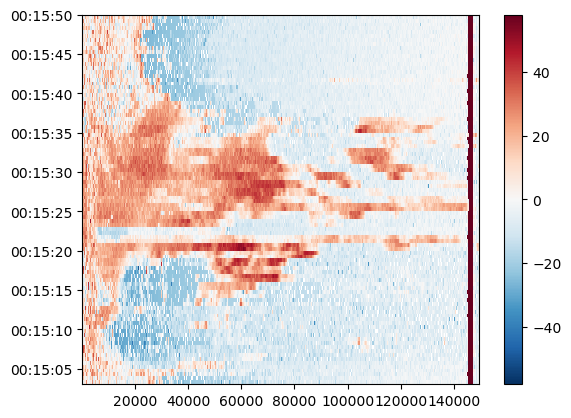

In [8]:
swp.DBZ.sortby("time").plot(x="range", y="time", add_labels=False)

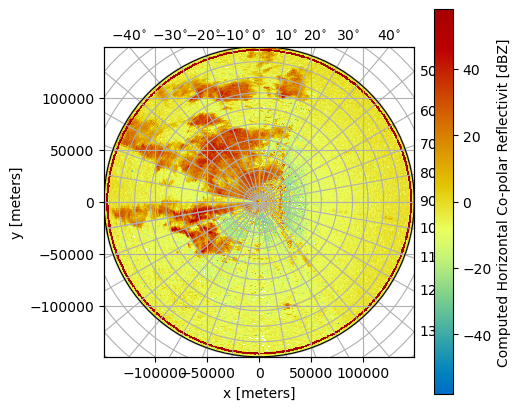

In [9]:
fig = plt.figure(figsize=(5, 5))
pm = swp.DBZ.wrl.vis.plot(crs={"latmin": 3e3}, fig=fig)

## Use `xr.open_dataset` to retrieve explicit group

<div class="alert alert-warning">

**Warning** <br>
    
Since $\omega radlib$ version 2.0 all xarray backend related functionality is imported from [xradar](https://github.com/openradar/xradar)-package.
    
</div>


In [10]:
swp_b = xr.open_dataset(
    f, engine="cfradial1", group="sweep_1", backend_kwargs=dict(reindex_angle=False)
)
display(swp_b)

<xarray.Dataset> Size: 4MB
Dimensions:                    (azimuth: 483, range: 996)
Coordinates:
    time                       (azimuth) datetime64[ns] 4kB ...
  * range                      (range) float32 4kB 150.0 300.0 ... 1.494e+05
  * azimuth                    (azimuth) float32 2kB 0.0 0.75 ... 358.5 359.2
    elevation                  (azimuth) float32 2kB ...
    latitude                   float64 8B ...
    longitude                  float64 8B ...
    altitude                   float64 8B ...
Data variables: (12/18)
    sweep_number               int32 4B ...
    sweep_mode                 <U20 80B ...
    prt_mode                   |S32 32B ...
    follow_mode                |S32 32B ...
    sweep_fixed_angle          float32 4B ...
    pulse_width                (azimuth) timedelta64[ns] 4kB ...
    ...                         ...
    r_calib_index              (azimuth) int8 483B ...
    measured_transmit_power_h  (azimuth) float32 2kB ...
    measured_transmit_power_v  (azimuth) float32 2kB ...
    scan_rate                  (azimuth) float32 2kB ...
    DBZ                        (azimuth, range) float32 2MB ...
    VR                         (azimuth, range) float32 2MB ...